# Работаем с pandas и визуализацией данных

*Весенний проект по курсу [«Наука о данных»](http://math-info.hse.ru/s18/y), Совместный бакалавриат ВШЭ-РЭШ, 2018-19 учебный год.*

*Автор работы: Даниил Бушуев.*

#data taken from here - https://missingmigrants.iom.int/downloads

Будем анализировать случаи смертей мигрантов

In [1]:
import pandas as pd 

data = pd.read_csv('MissingMigrants-Global-2019-04-12T02-13-32.csv')

data.shape

(5343, 20)

In [2]:
data.head()

Web ID Region of Incident   Reported Date  Reported Year Reported Month  \
0   51602    Central America  April 03, 2019           2019            Apr   
1   51601      Mediterranean  April 02, 2019           2019            Apr   
2   51600      Mediterranean  April 01, 2019           2019            Apr   
3   51597             Europe  March 31, 2019           2019            Mar   
4   51598             Europe  March 31, 2019           2019            Mar   

   Number Dead  Minimum Estimated Number of Missing Total Dead and Missing  \
0          1.0                                  NaN                      1   
1          1.0                                  NaN                      1   
2          1.0                                  NaN                      1   
3          1.0                                  NaN                      1   
4          1.0                                  NaN                      1   

   Number of Survivors  Number of Females  Number of Males  \
0                  NaN                NaN              1.0   
1                  NaN                NaN              NaN   
2                 12.0                NaN              1.0   
3                 14.0                NaN              1.0   
4                  NaN                NaN              1.0   

   Number of Children                Cause of Death  \
0                 NaN             Fall from vehicle   
1                 NaN             Presumed drowning   
2                 NaN                   Hypothermia   
3                 NaN             Fall from vehicle   
4                 NaN  Fall into a mountain crevice   

                                Location Description  \
0  Road towards Comunidad Estación La Colorada, n...   
1  Off the coast of Al-Hoceima, Morocco (Alboran ...   
2  After disembarkation in Port of Tarifa, Cádiz,...   
3  Along Udovo-Demir Kapija road, near Vodisirska...   
4  Forest area north of Javornik, north-west of P...   

                                  Information Source  \
0                                   Zacatecas Online   
1  Association Marocaine des Droits Humains - Sec...   
2                                    Europa Sur, ABC   
3  North Macedonia Ministry of Interior via IOM S...   
4  Police Directorate of Lika Senj, HGSS (Croatia...   

                 Location Coordinates        Migration Route  \
0  23.260560931726, -102.337369154380                    NaN   
1    35.358181389497, -3.963637678454  Western Mediterranean   
2    35.980298764742, -5.773669680016  Western Mediterranean   
3    41.420003176858, 22.222123150364        Western Balkans   
4    44.983703900000, 15.476410700000        Western Balkans   

                                                 URL  \
0                              http://bit.ly/2IcH2nB   
1  https://www.facebook.com/AmdhNador/posts/23026...   
2       http://bit.ly/2FIuwcB, http://bit.ly/2uDo2GR   
3                                                NaN   
4  http://bit.ly/2YN6OVc, http://bit.ly/2uDzdiJ, ...   

  UNSD Geographical Grouping  Source Quality  
0            Central America               1  
1              Uncategorized               4  
2              Uncategorized               3  
3            Southern Europe               5  
4            Southern Europe               5

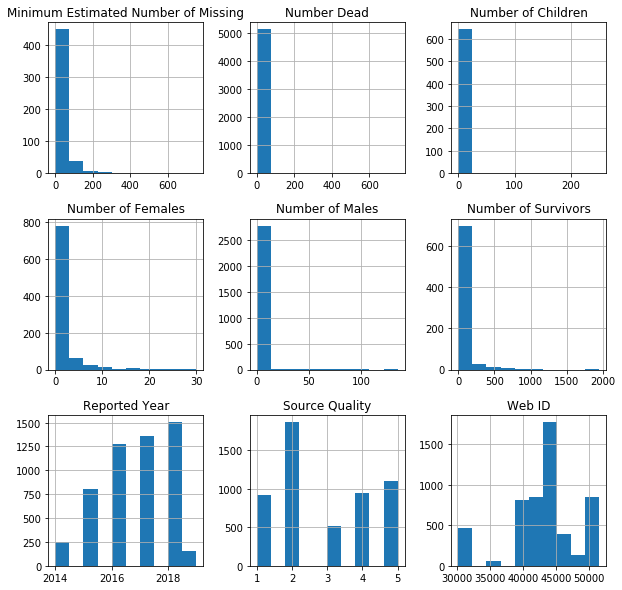

In [4]:
import matplotlib.pyplot as plt

data.hist()
plt.show()
plt.rcParams["figure.figsize"] = [10, 10]

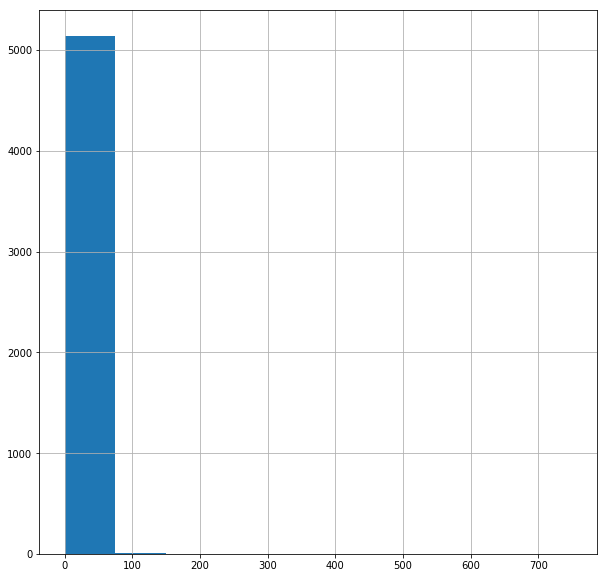

In [5]:
data['Number Dead'].hist()
plt.show()

In [6]:
data['Number Dead'].max()

750.0

750 человек погибло! Ничего себе! Давайте почитаем больше об этом

In [7]:
data[data['Number Dead'] == 750]['URL']

4987    http://bit.ly/1Oa2qYi
Name: URL, dtype: object

In [9]:
data[data['Number Dead'] == 750]

Web ID Region of Incident   Reported Date  Reported Year Reported Month  \
4987   40345      Mediterranean  April 18, 2015           2015            Apr   

      Number Dead  Minimum Estimated Number of Missing Total Dead and Missing  \
4987        750.0                                272.0                  1,022   

      Number of Survivors  Number of Females  Number of Males  \
4987                 28.0                NaN              NaN   

      Number of Children Cause of Death  \
4987                 NaN       Drowning   

                                   Location Description Information Source  \
4987  120 miles south of Lampedusa, 110 kilometers n...               ICRC   

                  Location Coordinates        Migration Route  \
4987  35.030000000000, 14.677700000000  Central Mediterranean   

                        URL UNSD Geographical Grouping  Source Quality  
4987  http://bit.ly/1Oa2qYi              Uncategorized               4

Займемся подготовкой данных для визуализации. Сначала нам надо разделить долготу и широту в разные переменные.

In [7]:
data['latitude'], data['longitude'] = data['Location Coordinates'].str.split(',', 1).str

In [8]:
data.head()

Web ID Region of Incident   Reported Date  Reported Year Reported Month  \
0   51602    Central America  April 03, 2019           2019            Apr   
1   51601      Mediterranean  April 02, 2019           2019            Apr   
2   51600      Mediterranean  April 01, 2019           2019            Apr   
3   51597             Europe  March 31, 2019           2019            Mar   
4   51598             Europe  March 31, 2019           2019            Mar   

   Number Dead  Minimum Estimated Number of Missing Total Dead and Missing  \
0          1.0                                  NaN                      1   
1          1.0                                  NaN                      1   
2          1.0                                  NaN                      1   
3          1.0                                  NaN                      1   
4          1.0                                  NaN                      1   

   Number of Survivors  Number of Females         ...          \
0                  NaN                NaN         ...           
1                  NaN                NaN         ...           
2                 12.0                NaN         ...           
3                 14.0                NaN         ...           
4                  NaN                NaN         ...           

                 Cause of Death  \
0             Fall from vehicle   
1             Presumed drowning   
2                   Hypothermia   
3             Fall from vehicle   
4  Fall into a mountain crevice   

                                Location Description  \
0  Road towards Comunidad Estación La Colorada, n...   
1  Off the coast of Al-Hoceima, Morocco (Alboran ...   
2  After disembarkation in Port of Tarifa, Cádiz,...   
3  Along Udovo-Demir Kapija road, near Vodisirska...   
4  Forest area north of Javornik, north-west of P...   

                                  Information Source  \
0                                   Zacatecas Online   
1  Association Marocaine des Droits Humains - Sec...   
2                                    Europa Sur, ABC   
3  North Macedonia Ministry of Interior via IOM S...   
4  Police Directorate of Lika Senj, HGSS (Croatia...   

                 Location Coordinates        Migration Route  \
0  23.260560931726, -102.337369154380                    NaN   
1    35.358181389497, -3.963637678454  Western Mediterranean   
2    35.980298764742, -5.773669680016  Western Mediterranean   
3    41.420003176858, 22.222123150364        Western Balkans   
4    44.983703900000, 15.476410700000        Western Balkans   

                                                 URL  \
0                              http://bit.ly/2IcH2nB   
1  https://www.facebook.com/AmdhNador/posts/23026...   
2       http://bit.ly/2FIuwcB, http://bit.ly/2uDo2GR   
3                                                NaN   
4  http://bit.ly/2YN6OVc, http://bit.ly/2uDzdiJ, ...   

  UNSD Geographical Grouping Source Quality         latitude  \
0            Central America              1  23.260560931726   
1              Uncategorized              4  35.358181389497   
2              Uncategorized              3  35.980298764742   
3            Southern Europe              5  41.420003176858   
4            Southern Europe              5  44.983703900000   

            longitude  
0   -102.337369154380  
1     -3.963637678454  
2     -5.773669680016  
3     22.222123150364  
4     15.476410700000  

[5 rows x 22 columns]

In [9]:
data['latitude'] = pd.to_numeric(data['latitude'])
data['longitude'] = pd.to_numeric(data['longitude'])

Найдем и избавимся от пропусков в важных для нас данных

In [10]:
data[data['latitude'].isnull() == True]

Web ID  Region of Incident  Reported Date  Reported Year Reported Month  \
2453   51450  Sub-Saharan Africa  June 27, 2017           2017            Jun   

      Number Dead  Minimum Estimated Number of Missing Total Dead and Missing  \
2453          1.0                                  NaN                      1   

      Number of Survivors  Number of Females    ...      \
2453                  NaN                1.0    ...       

                                Cause of Death  Location Description  \
2453  Sickness and lack of access to medicines  Sahara Desert, Niger   

                              Information Source Location Coordinates  \
2453  Mixed Migration Monitoring Mechanism (4mi)                  NaN   

     Migration Route                                 URL  \
2453             NaN  http://www.mixedmigration.org/4mi/   

     UNSD Geographical Grouping Source Quality latitude  longitude  
2453             Western Europe              2      NaN        NaN  

[1 rows x 22 columns]

In [11]:
data = data.drop(data[data['latitude'].isnull() == True].index)
data = data.reset_index(drop = True)
data

Web ID Region of Incident      Reported Date  Reported Year  \
0      51602    Central America     April 03, 2019           2019   
1      51601      Mediterranean     April 02, 2019           2019   
2      51600      Mediterranean     April 01, 2019           2019   
3      51597             Europe     March 31, 2019           2019   
4      51598             Europe     March 31, 2019           2019   
5      51599          Caribbean     March 31, 2019           2019   
6      51591      Mediterranean     March 28, 2019           2019   
7      51588      Mediterranean     March 26, 2019           2019   
8      51589      Mediterranean     March 26, 2019           2019   
9      51590      Mediterranean     March 26, 2019           2019   
10     51587    Central America     March 25, 2019           2019   
11     51596   US-Mexico Border     March 24, 2019           2019   
12     51580   US-Mexico Border     March 23, 2019           2019   
13     51581   US-Mexico Border     March 23, 2019           2019   
14     51585     Southeast Asia     March 23, 2019           2019   
15     51586      Mediterranean     March 23, 2019           2019   
16     51595      Mediterranean     March 23, 2019           2019   
17     51594      Mediterranean     March 22, 2019           2019   
18     51578   US-Mexico Border     March 21, 2019           2019   
19     51579   US-Mexico Border     March 21, 2019           2019   
20     51584    Central America     March 20, 2019           2019   
21     51548      Mediterranean     March 19, 2019           2019   
22     51593      Mediterranean     March 19, 2019           2019   
23     51546      Mediterranean     March 18, 2019           2019   
24     51545    Central America     March 17, 2019           2019   
25     51547       North Africa     March 17, 2019           2019   
26     51577   US-Mexico Border     March 15, 2019           2019   
27     51544      Mediterranean     March 14, 2019           2019   
28     51576   US-Mexico Border     March 13, 2019           2019   
29     51534          Caribbean     March 11, 2019           2019   
...      ...                ...                ...            ...   
5312   39230      Mediterranean  February 27, 2014           2014   
5313   39229     Horn of Africa  February 26, 2014           2014   
5314   39379         South Asia  February 26, 2014           2014   
5315   39271   US-Mexico Border  February 25, 2014           2014   
5316   39270   US-Mexico Border  February 21, 2014           2014   
5317   39196          Caribbean  February 20, 2014           2014   
5318   39269   US-Mexico Border  February 20, 2014           2014   
5319   39211   US-Mexico Border  February 18, 2014           2014   
5320   39228      Mediterranean  February 17, 2014           2014   
5321   39268   US-Mexico Border  February 17, 2014           2014   
5322   39266   US-Mexico Border  February 16, 2014           2014   
5323   39267   US-Mexico Border  February 16, 2014           2014   
5324   39265   US-Mexico Border  February 11, 2014           2014   
5325   39404      Mediterranean  February 06, 2014           2014   
5326   39195          Caribbean   January 30, 2014           2014   
5327   39373             Europe   January 30, 2014           2014   
5328   39263   US-Mexico Border   January 29, 2014           2014   
5329   39264   US-Mexico Border   January 29, 2014           2014   
5330   39262   US-Mexico Border   January 28, 2014           2014   
5331   39208   US-Mexico Border   January 25, 2014           2014   
5332   39260   US-Mexico Border   January 24, 2014           2014   
5333   39261   US-Mexico Border   January 24, 2014           2014   
5334   39259   US-Mexico Border   January 22, 2014           2014   
5335   39403      Mediterranean   January 19, 2014           2014   
5336   39258   US-Mexico Border   January 17, 2014           2014   
5337   39207   US-Mexico Border   January 16, 2014           2014   
5338

Начинаем работать с визуализацией

In [18]:
import gmaps
gmaps.configure(api_key='xxx') #здесь надо вставить ключ доступа к API Google Maps
#если ключа у вас нет, то результаты в виде картинке можно найти в приложенной папке

In [13]:
#может вылететь ошибка 404 в терминале
#решение - https://github.com/pbugnion/gmaps/issues/79

locations = data[['latitude', 'longitude']]
fig = gmaps.figure(map_type='HYBRID')
heatmap_layer = gmaps.heatmap_layer(locations)
fig.add_layer(heatmap_layer)
fig

A Jupyter Widget

In [14]:
heatmap_layer.max_intensity = 5 #карта сверху обновилась
heatmap_layer.point_radius = 5

К сожалению, такая визуализация не отражает степень происшествий. Например, на границе США и Мексики могут происходить единичные вылазки, когда в Европе тонут корабли с сотнями мигрантов. Давайте поработаем с магнитудой.

In [15]:
from sklearn import preprocessing

data['Number Dead'] = pd.to_numeric(data['Number Dead'])
data['Number Dead'] = data['Number Dead'].fillna(0)

data['Minimum Estimated Number of Missing'] = pd.to_numeric(data['Minimum Estimated Number of Missing'])
data['Minimum Estimated Number of Missing'] = data['Minimum Estimated Number of Missing'].fillna(0)

scaler = preprocessing.MaxAbsScaler()
scaledDead = scaler.fit_transform(data['Number Dead'].values.reshape(-1, 1)) 
scaledMissing = scaler.fit_transform(data['Minimum Estimated Number of Missing'].values.reshape(-1, 1)) 

data['scaledDead'] = pd.DataFrame(scaledDead)
data['scaledMissing'] = pd.DataFrame(scaledMissing)
data['magnitude'] = data['scaledDead'] + 0.5 * data['scaledMissing']
data


Web ID Region of Incident      Reported Date  Reported Year  \
0      51602    Central America     April 03, 2019           2019   
1      51601      Mediterranean     April 02, 2019           2019   
2      51600      Mediterranean     April 01, 2019           2019   
3      51597             Europe     March 31, 2019           2019   
4      51598             Europe     March 31, 2019           2019   
5      51599          Caribbean     March 31, 2019           2019   
6      51591      Mediterranean     March 28, 2019           2019   
7      51588      Mediterranean     March 26, 2019           2019   
8      51589      Mediterranean     March 26, 2019           2019   
9      51590      Mediterranean     March 26, 2019           2019   
10     51587    Central America     March 25, 2019           2019   
11     51596   US-Mexico Border     March 24, 2019           2019   
12     51580   US-Mexico Border     March 23, 2019           2019   
13     51581   US-Mexico Border     March 23, 2019           2019   
14     51585     Southeast Asia     March 23, 2019           2019   
15     51586      Mediterranean     March 23, 2019           2019   
16     51595      Mediterranean     March 23, 2019           2019   
17     51594      Mediterranean     March 22, 2019           2019   
18     51578   US-Mexico Border     March 21, 2019           2019   
19     51579   US-Mexico Border     March 21, 2019           2019   
20     51584    Central America     March 20, 2019           2019   
21     51548      Mediterranean     March 19, 2019           2019   
22     51593      Mediterranean     March 19, 2019           2019   
23     51546      Mediterranean     March 18, 2019           2019   
24     51545    Central America     March 17, 2019           2019   
25     51547       North Africa     March 17, 2019           2019   
26     51577   US-Mexico Border     March 15, 2019           2019   
27     51544      Mediterranean     March 14, 2019           2019   
28     51576   US-Mexico Border     March 13, 2019           2019   
29     51534          Caribbean     March 11, 2019           2019   
...      ...                ...                ...            ...   
5312   39230      Mediterranean  February 27, 2014           2014   
5313   39229     Horn of Africa  February 26, 2014           2014   
5314   39379         South Asia  February 26, 2014           2014   
5315   39271   US-Mexico Border  February 25, 2014           2014   
5316   39270   US-Mexico Border  February 21, 2014           2014   
5317   39196          Caribbean  February 20, 2014           2014   
5318   39269   US-Mexico Border  February 20, 2014           2014   
5319   39211   US-Mexico Border  February 18, 2014           2014   
5320   39228      Mediterranean  February 17, 2014           2014   
5321   39268   US-Mexico Border  February 17, 2014           2014   
5322   39266   US-Mexico Border  February 16, 2014           2014   
5323   39267   US-Mexico Border  February 16, 2014           2014   
5324   39265   US-Mexico Border  February 11, 2014           2014   
5325   39404      Mediterranean  February 06, 2014           2014   
5326   39195          Caribbean   January 30, 2014           2014   
5327   39373             Europe   January 30, 2014           2014   
5328   39263   US-Mexico Border   January 29, 2014           2014   
5329   39264   US-Mexico Border   January 29, 2014           2014   
5330   39262   US-Mexico Border   January 28, 2014           2014   
5331   39208   US-Mexico Border   January 25, 2014           2014   
5332   39260   US-Mexico Border   January 24, 2014           2014   
5333   39261   US-Mexico Border   January 24, 2014           2014   
5334   39259   US-Mexico Border   January 22, 2014           2014   
5335   39403      Mediterranean   January 19, 2014           2014   
5336   39258   US-Mexico Border   January 17, 2014           2014   
5337   39207   US-Mexico Border   January 16, 2014           2014   
5338

In [16]:
figWeighted = gmaps.figure()
figWeighted = gmaps.figure(map_type='HYBRID')

heatmapLayerWeighted = gmaps.heatmap_layer(locations, weights = data['magnitude'], max_intensity=1, point_radius=5)
figWeighted.add_layer(heatmapLayerWeighted)

Теперь на карте мы не видим единичные случаи. Больше всего выделяются места где поистине происходит кризис с большим количеством жертв. 

In [17]:
figWeighted

A Jupyter Widget

На случай, если ключа у вас не нашлось, то вот результат выполнения скрипта на карте

<img src='images/map-2.png'>

<img src='images/map-3.png'>

# Работаем с машинным обучением и математикой

Как видно на карте выше, больше всего проблем происходит на границах и в Средиземном море. Давайте посмотрим как описание происшествия влияет на его магнитуду. Для начала подготовим данные. 

In [23]:
data.columns

Index(['Web ID', 'Region of Incident', 'Reported Date', 'Reported Year',
       'Reported Month', 'Number Dead', 'Minimum Estimated Number of Missing',
       'Total Dead and Missing', 'Number of Survivors', 'Number of Females',
       'Number of Males', 'Number of Children', 'Cause of Death',
       'Location Description', 'Information Source', 'Location Coordinates',
       'Migration Route', 'URL', 'UNSD Geographical Grouping',
       'Source Quality', 'latitude', 'longitude', 'scaledDead',
       'scaledMissing', 'magnitude'],
      dtype='object')

In [24]:
data['Location Description'].head()

0    Road towards Comunidad Estación La Colorada, n...
1    Off the coast of Al-Hoceima, Morocco (Alboran ...
2    After disembarkation in Port of Tarifa, Cádiz,...
3    Along Udovo-Demir Kapija road, near Vodisirska...
4    Forest area north of Javornik, north-west of P...
Name: Location Description, dtype: object

In [26]:
dataML = data.copy()
dataML.shape

(5342, 25)

In [27]:
dataML

Web ID Region of Incident      Reported Date  Reported Year  \
0      51602    Central America     April 03, 2019           2019   
1      51601      Mediterranean     April 02, 2019           2019   
2      51600      Mediterranean     April 01, 2019           2019   
3      51597             Europe     March 31, 2019           2019   
4      51598             Europe     March 31, 2019           2019   
5      51599          Caribbean     March 31, 2019           2019   
6      51591      Mediterranean     March 28, 2019           2019   
7      51588      Mediterranean     March 26, 2019           2019   
8      51589      Mediterranean     March 26, 2019           2019   
9      51590      Mediterranean     March 26, 2019           2019   
10     51587    Central America     March 25, 2019           2019   
11     51596   US-Mexico Border     March 24, 2019           2019   
12     51580   US-Mexico Border     March 23, 2019           2019   
13     51581   US-Mexico Border     March 23, 2019           2019   
14     51585     Southeast Asia     March 23, 2019           2019   
15     51586      Mediterranean     March 23, 2019           2019   
16     51595      Mediterranean     March 23, 2019           2019   
17     51594      Mediterranean     March 22, 2019           2019   
18     51578   US-Mexico Border     March 21, 2019           2019   
19     51579   US-Mexico Border     March 21, 2019           2019   
20     51584    Central America     March 20, 2019           2019   
21     51548      Mediterranean     March 19, 2019           2019   
22     51593      Mediterranean     March 19, 2019           2019   
23     51546      Mediterranean     March 18, 2019           2019   
24     51545    Central America     March 17, 2019           2019   
25     51547       North Africa     March 17, 2019           2019   
26     51577   US-Mexico Border     March 15, 2019           2019   
27     51544      Mediterranean     March 14, 2019           2019   
28     51576   US-Mexico Border     March 13, 2019           2019   
29     51534          Caribbean     March 11, 2019           2019   
...      ...                ...                ...            ...   
5312   39230      Mediterranean  February 27, 2014           2014   
5313   39229     Horn of Africa  February 26, 2014           2014   
5314   39379         South Asia  February 26, 2014           2014   
5315   39271   US-Mexico Border  February 25, 2014           2014   
5316   39270   US-Mexico Border  February 21, 2014           2014   
5317   39196          Caribbean  February 20, 2014           2014   
5318   39269   US-Mexico Border  February 20, 2014           2014   
5319   39211   US-Mexico Border  February 18, 2014           2014   
5320   39228      Mediterranean  February 17, 2014           2014   
5321   39268   US-Mexico Border  February 17, 2014           2014   
5322   39266   US-Mexico Border  February 16, 2014           2014   
5323   39267   US-Mexico Border  February 16, 2014           2014   
5324   39265   US-Mexico Border  February 11, 2014           2014   
5325   39404      Mediterranean  February 06, 2014           2014   
5326   39195          Caribbean   January 30, 2014           2014   
5327   39373             Europe   January 30, 2014           2014   
5328   39263   US-Mexico Border   January 29, 2014           2014   
5329   39264   US-Mexico Border   January 29, 2014           2014   
5330   39262   US-Mexico Border   January 28, 2014           2014   
5331   39208   US-Mexico Border   January 25, 2014           2014   
5332   39260   US-Mexico Border   January 24, 2014           2014   
5333   39261   US-Mexico Border   January 24, 2014           2014   
5334   39259   US-Mexico Border   January 22, 2014           2014   
5335   39403      Mediterranean   January 19, 2014           2014   
5336   39258   US-Mexico Border   January 17, 2014           2014   
5337   39207   US-Mexico Border   January 16, 2014           2014   
5338

In [28]:
dataML.drop(dataML[dataML['Location Description'].isnull() == True].index, inplace=True)
dataML.shape

(5333, 25)

In [29]:
dataML = dataML.reset_index(drop=True)
dataML

Web ID Region of Incident      Reported Date  Reported Year  \
0      51602    Central America     April 03, 2019           2019   
1      51601      Mediterranean     April 02, 2019           2019   
2      51600      Mediterranean     April 01, 2019           2019   
3      51597             Europe     March 31, 2019           2019   
4      51598             Europe     March 31, 2019           2019   
5      51599          Caribbean     March 31, 2019           2019   
6      51591      Mediterranean     March 28, 2019           2019   
7      51588      Mediterranean     March 26, 2019           2019   
8      51589      Mediterranean     March 26, 2019           2019   
9      51590      Mediterranean     March 26, 2019           2019   
10     51587    Central America     March 25, 2019           2019   
11     51596   US-Mexico Border     March 24, 2019           2019   
12     51580   US-Mexico Border     March 23, 2019           2019   
13     51581   US-Mexico Border     March 23, 2019           2019   
14     51585     Southeast Asia     March 23, 2019           2019   
15     51586      Mediterranean     March 23, 2019           2019   
16     51595      Mediterranean     March 23, 2019           2019   
17     51594      Mediterranean     March 22, 2019           2019   
18     51578   US-Mexico Border     March 21, 2019           2019   
19     51579   US-Mexico Border     March 21, 2019           2019   
20     51584    Central America     March 20, 2019           2019   
21     51548      Mediterranean     March 19, 2019           2019   
22     51593      Mediterranean     March 19, 2019           2019   
23     51546      Mediterranean     March 18, 2019           2019   
24     51545    Central America     March 17, 2019           2019   
25     51547       North Africa     March 17, 2019           2019   
26     51577   US-Mexico Border     March 15, 2019           2019   
27     51544      Mediterranean     March 14, 2019           2019   
28     51576   US-Mexico Border     March 13, 2019           2019   
29     51534          Caribbean     March 11, 2019           2019   
...      ...                ...                ...            ...   
5303   39230      Mediterranean  February 27, 2014           2014   
5304   39229     Horn of Africa  February 26, 2014           2014   
5305   39379         South Asia  February 26, 2014           2014   
5306   39271   US-Mexico Border  February 25, 2014           2014   
5307   39270   US-Mexico Border  February 21, 2014           2014   
5308   39196          Caribbean  February 20, 2014           2014   
5309   39269   US-Mexico Border  February 20, 2014           2014   
5310   39211   US-Mexico Border  February 18, 2014           2014   
5311   39228      Mediterranean  February 17, 2014           2014   
5312   39268   US-Mexico Border  February 17, 2014           2014   
5313   39266   US-Mexico Border  February 16, 2014           2014   
5314   39267   US-Mexico Border  February 16, 2014           2014   
5315   39265   US-Mexico Border  February 11, 2014           2014   
5316   39404      Mediterranean  February 06, 2014           2014   
5317   39195          Caribbean   January 30, 2014           2014   
5318   39373             Europe   January 30, 2014           2014   
5319   39263   US-Mexico Border   January 29, 2014           2014   
5320   39264   US-Mexico Border   January 29, 2014           2014   
5321   39262   US-Mexico Border   January 28, 2014           2014   
5322   39208   US-Mexico Border   January 25, 2014           2014   
5323   39260   US-Mexico Border   January 24, 2014           2014   
5324   39261   US-Mexico Border   January 24, 2014           2014   
5325   39259   US-Mexico Border   January 22, 2014           2014   
5326   39403      Mediterranean   January 19, 2014           2014   
5327   39258   US-Mexico Border   January 17, 2014           2014   
5328   39207   US-Mexico Border   January 16, 2014           2014   
5329

Отлично, данные готовы, можно начинать машинное обучение!

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

vec = TfidfVectorizer()    #текстовое описание локации мы будем обрабатывать методом TF-IDF
vec.fit_transform(dataML['Location Description'])

<5333x3277 sparse matrix of type '<class 'numpy.float64'>'
	with 30761 stored elements in Compressed Sparse Row format>

Предсказывать будем с помощью метода опорных векторов. Для начала давайте подберем лучший параметр для обучения.

In [31]:
#подберем лучший параметр для метода опорных векторов
from sklearn.svm import SVC
from sklearn.cross_validation import KFold
from sklearn.model_selection import GridSearchCV
import numpy as np


#ValueError: Unknown label type: ‘continuous’
#решение взято тут - https://www.kaggle.com/pratsiuk/valueerror-unknown-label-type-continuous
lab_enc = preprocessing.LabelEncoder()
training_scores_encoded = lab_enc.fit_transform(dataML['magnitude'])

grid = {'C': np.power(10.0, np.arange(-1, 1))}
cv = KFold(len(training_scores_encoded), n_folds=5, shuffle=True, random_state=241)
model = SVC(kernel='linear', random_state=241)
const = GridSearchCV(model, grid, scoring='accuracy', cv=cv)
const.fit(vec.transform(dataML['Location Description']), training_scores_encoded)
best_const = const.best_params_.get('C')
print(best_const)

/Users/Daniil/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


1.0


Построим модель с ранее найденным оптимальным параметром

In [32]:
model = SVC(kernel='linear', random_state=241, C = best_const)
model.fit(vec.transform(dataML['Location Description']), training_scores_encoded)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=241, shrinking=True,
  tol=0.001, verbose=False)

Интересно, а какие слова из описания сильнее всего увеличивают или уменьшают магнитуду?

In [33]:
word = vec.get_feature_names()
coef = abs(model.coef_.data)
lst = list(zip(coef, word))
df = pd.DataFrame(lst)
df.sort_values(by=0, ascending=False)

0              1
1498  1.251531  international
438   1.251531          balau
2986  1.251531     tostaditas
108   1.251531           50km
3214  1.251531   yamoussoukro
1580  1.251531       jonquera
2206  1.094850       occurred
2658  1.050922            see
1947  0.988499            med
1865  0.918991          mamfe
2485  0.917374     ravadinovo
2151  0.907873           next
831   0.888227            col
735   0.863365       cascajal
2787  0.818718        springs
733   0.813052           casa
2179  0.807834   northwestern
2203  0.807074        obregón
2496  0.806541            red
2792  0.798384        stadium
2186  0.785192           novo
773   0.755398        charles
1871  0.752013       mangrove
138   0.749863             83
1647  0.746148         kelian
126   0.739611          66653
791   0.739611      chinameca
849   0.739611       comisión
710   0.739611            cap
3004  0.739611        transit
...        ...            ...
1273  0.002330        geherre
1024  0.002072          docks
2173  0.002038          norte
2109  0.001956            n32
2108  0.001841           n216
532   0.001720         bicske
2092  0.001611         mutred
1260  0.001589         garisa
651   0.001547            bvd
1280  0.001505      gevgelija
1281  0.001457       geyikova
305   0.001453          amoda
1726  0.001413        kurfrah
647   0.001404        burkina
640   0.001339      bulgarian
595   0.001289      boumerdès
1002  0.001064      dioulasso
646   0.000846         burial
618   0.000649         brigde
2123  0.000600         narino
2124  0.000596         nariño
2122  0.000590       naranjas
533   0.000509            big
668   0.000466       cagliari
670   0.000466       cahoacán
667   0.000466           cage
669   0.000376        caguama
1482  0.000350       incident
1483  0.000334  independencia
1481  0.000323             in

[3277 rows x 2 columns]

In [ ]:
#obregón город на юге калифорнии
#jonquera город на границе испании

# Работаем с web scrapping

Реализуем поиск места по его фотографии из ВК. К сожалению, данный метод поиска ограничен возможностями поиска Google.

In [80]:
#soup скрэппинг не работает((( так что юзаем селениум
import time
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup

def getLocation(urlImage):
    urlGoogleImageSearch = 'https://images.google.com/imghp?sbi=1&hl=en-us'
    
    browser = webdriver.Safari()
    browser.get(urlGoogleImageSearch) 
    search = browser.find_element_by_name('image_url')
    search.send_keys(urlImage)
    search.send_keys(Keys.RETURN) 
    
    time.sleep(5) #ждем пока прогрузится новая страница
    
    bs = BeautifulSoup(browser.page_source) 
    for link in bs.findAll('a', href=True, text='Maps'):
        urlMaps = link['href']
        break
    
    browser.get(urlMaps)
    time.sleep(5)
    
    page = BeautifulSoup(browser.page_source)
    #print(browser.page_source)
    
    for heading in page.findAll('h1'):
        location = heading.text
        break
    
    time.sleep(5)
    browser.quit()
    
    return location

In [75]:
def getVkImage(urlVkImage):
    browser = webdriver.Safari()
    browser.get(urlVkImage) 
    time.sleep(3)
    page = BeautifulSoup(browser.page_source)
    for img in page.findAll('img'):
        url = img['src']
        break
        
    browser.quit()
    return url

In [94]:
urlVkImage = 'https://vk.com/russia.travel.official?z=photo-61009220_456243158%2Falbum-61009220_00%2Frev'

In [95]:
urlImage = getVkImage(urlVkImage)
urlImage

/Users/Daniil/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /Users/Daniil/anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


'https://pp.userapi.com/c849120/v849120268/77880/aZGbbgxjN5c.jpg'

<img src='https://pp.userapi.com/c849120/v849120268/77880/aZGbbgxjN5c.jpg' width='300'>

In [96]:
place = getLocation(urlImage)
place

/Users/Daniil/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /Users/Daniil/anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


'Monument Millennium of Russia'

# Работаем с API


Я у мамы Илон Маск вжух! Воспользуемся API NASA для эмуляции приключений на Марсе) Будем делать запрос к камерам разных марсоходов и собирать в фильм.

In [110]:
#https://api.nasa.gov/api.html#MarsPhotos

In [124]:
import imageio
from PIL import Image
import requests
from io import BytesIO
import requests

count = 0
cameraType = ['rhaz', 'chemcam', 'mast']
countCamera = dict()

for camera in cameraType:
    url = 'https://api.nasa.gov/mars-photos/api/v1/rovers/curiosity/photos?sol=1000&camera=' + camera + '&api_key=DEMO_KEY'
    r = requests.get(url)
    q = r.json()

    count = 0
    
    for i in q['photos']:
        count = count + 1
        
        r = requests.get(i['img_src'])            
        img = Image.open(BytesIO(r.content))      
        img.save('images/' + camera + str(count) + '.png') 
        if count == 30:
            break
       
    countCamera[camera] = count


In [125]:
countCamera

{'chemcam': 4, 'mast': 30, 'rhaz': 2}

теперь соберем все в gif

In [135]:
def imagesToGif(camera, numberOfImages, start = 1, step = 1, cameraSubType = ''):
    with imageio.get_writer('images/movie-' + camera + cameraSubType + '.gif', mode='I') as writer:
        for i in range(start, numberOfImages + 1, step):
            image = imageio.imread('images/' + camera + str(i) + '.png')
            writer.append_data(image)
    return

In [136]:
for camera in cameraType:
    if camera == 'mast':
        imagesToGif(camera, countCamera[camera], step = 2, cameraSubType = '-one')
        imagesToGif(camera, countCamera[camera], step = 2, start = 2, cameraSubType = '-two')
    else:
        imagesToGif(camera, countCamera[camera])    

<img src='images/movie-mast-one.gif' width="300"> #запусти ячейки чтобы увидеть gif

<img src='images/movie-mast-two.gif' width="600"> #запусти ячейки чтобы увидеть gif

<img src='images/movie-rhaz.gif' width="300"/> #запусти ячейки чтобы увидеть gif

<img src='images/movie-chemcam.gif' width="300"/> #запусти ячейки чтобы увидеть gif